In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np

In [71]:
df = pd.read_csv('Housing.csv')
originalArea = df['area']
areaCopy = originalArea
priceCopy = df['price']

In [72]:
#Checking columns, which has a str values
values = []
for i in range(len(df.columns)): 
    if(type(df[df.columns[i]][1]) == str):
        values.append(df.columns[i])

In [73]:
#Replacing str values to numbers
for i in range(len(values)):
    if(values[i] == values[len(values)-1]):
        df[values[i]] = df[values[i]].replace(('furnished', 'semi-furnished', 'unfurnished'), (200, 100, 0))
        break
    df[values[i]] = df[values[i]].replace(('yes', 'no'), (50, 0))

In [74]:
#Normalizing data

maxValues = []
for i in range(1, len(df.columns)):
    maxValues.append(max(df[df.columns[i]]))
    
area = []
price = []
def NormalizingData(maxValues):
    for i in range(1, len(df.columns)):
        df[df.columns[i]] = df[df.columns[i]] / maxValues[i-1]
    return df

df = NormalizingData(maxValues)

In [75]:
#Splitting all data and fitting model
allExceptPrice = df.drop('price', axis=1)

x_train, x_test = train_test_split(allExceptPrice, test_size=0.15, random_state=45, shuffle=True)
y_train, y_test = train_test_split(df['price'], test_size=0.15, random_state=45, shuffle=True)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [76]:
#Testing data can be used for other purposes (visualise)
predictedValues = model.predict(x_test)

In [77]:
def YesorNo(value, withBladais):
    if(withBladais == False):
        if(value == '+'):
            return 1
        elif(value == '-'):
            return 0
    else:
        if(value == 'yes'):
            return 1
        elif(value == 'partially'):
            return 0.5
        elif (value == 'no'):
            return 0
        
def NormalizeInput(indexOfColumn, inputValue):
    normalizedValue = inputValue / maxValues[indexOfColumn]
    return normalizedValue

In [78]:
#Getting a prediction
questions = [f'What is the area in square foot?',
             'How many rooms?', 'How many bathrooms are there?', 'Which floor is the apartment on?',
             'Is there a mainroad (+/-)?', 'Is there a sitting room(+/-)?',
             'Is there a basement (+/-)?', 'Do you have hot water (+/-)?', 'Do you have air conditioning (+/-)?',
             'Do you have a parking space (+/-)?', 'Is there a bus stop nearby (+/-)?',
             'Is the apartment furnished (yes/partially/no)?']
binaryValues = ['+', '-']
wordValues = ['yes', 'partially', 'no']

arrayOfValues = []
area = 0
for i in range(len(questions)):
    inputValue = input(questions[i])

    if(i < 4):
        try:
            if int(inputValue) <= 0:
                print("Error. Value can't be negative. Restart the program!")
                break
        except ValueError:
            print("Error: Please enter a valid integer. Restart the program!")
            break
        if(i == 0):
            Sq = float(inputValue)
            area1 = Sq
            area = NormalizeInput(i, Sq)
            arrayOfValues.append(area)
        else:
            finalValue = NormalizeInput(i, float(inputValue))
            arrayOfValues.append(finalValue)
    elif( 4 <= i and i < len(questions)-1):
        if inputValue in binaryValues:
            yesOrNo = YesorNo(inputValue, False)
            arrayOfValues.append(yesOrNo)
        else: 
            print("Error. Value must be '+' or '-'. Restart the program!") 
            break
    else:
        if inputValue in wordValues:
            final = YesorNo(inputValue, True)
            arrayOfValues.append(final)
        else: 
            print("Error. Value must be '+' or '-'. Restart the program!") 
            break
arrayOfValues = np.array(arrayOfValues)
arrayOfValues = arrayOfValues.reshape(1, -1)
price = model.predict(arrayOfValues)

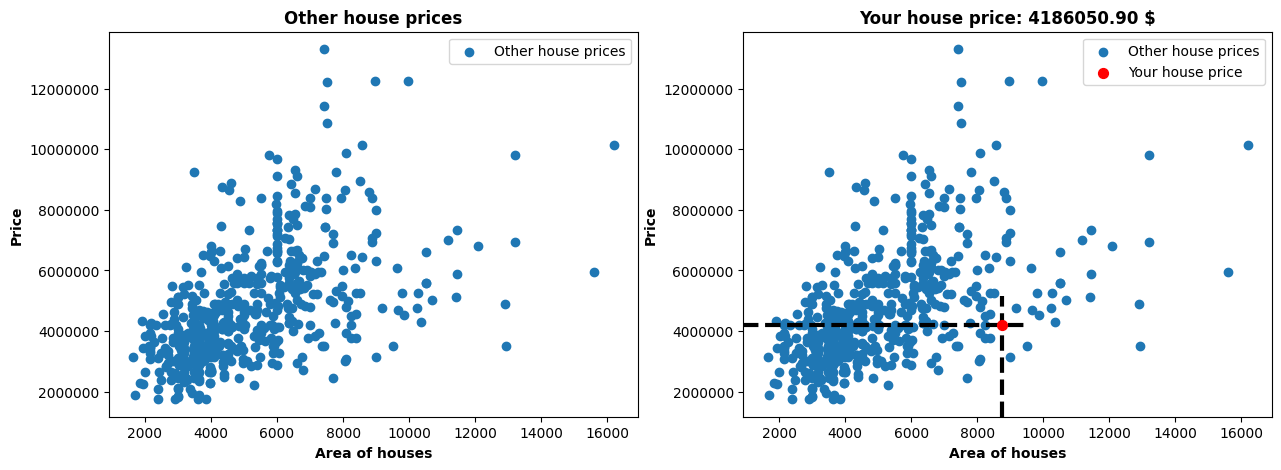

In [79]:
#Printing graphs
labels = ['Other house prices', 'Your house price']
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(areaCopy, df['price'], label=labels[0])
plt.ticklabel_format(axis='y', style='plain')
plt.legend(loc=1)
plt.ylabel("Price", weight='bold')
plt.xlabel("Area of houses", weight='bold')
plt.title("Other house prices", weight='bold')

plt.subplot(122)
plt.scatter(areaCopy, df['price'], label=labels[0])
plt.scatter(area1, price, color='red', s=50, zorder=100, label=labels[1])
plt.axhline(price, linestyle='dashed', color='black', xmin=0, xmax=area, linewidth=3)
plt.axvline(area1, linestyle='dashed', color='black', ymin=0, ymax=price[0]/max(df['price']), linewidth=3)
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel("Price", weight='bold')
plt.xlabel("Area of houses", weight='bold')
plt.title(f"Your house price: {price[0]:.2f} $", weight='bold')
plt.legend(loc=1)
plt.show()